In [51]:
# Mengimport Library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
# Membaca file csv
data = pd.read_csv("dataset/Titanic-Dataset.csv")

In [53]:
# Menampilkan deskripsi data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
# Menampilkan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
# Menampilkan data yang kosong
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
# Menampilkan data yang mempunyai duplikasi
data.duplicated().sum()

0

In [57]:
# Mengisi nilai yang hilang pada kolom 'Age' dengan median
data["Age"].fillna(data["Age"].median(), inplace=True)

# Menghapus kolom 'Cabin' karena terlalu banyak nilai yang hilang
data.drop(columns=["Cabin"], inplace=True)

# Mengisi nilai yang hilang pada kolom 'Embarked' dengan modus (nilai terbanyak)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

/var/folders/kw/w311m0vs4x741v7c24_d6xyw0000gn/T/ipykernel_17210/2595910978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
/var/folders/kw/w311m0vs4x741v7c24_d6xyw0000gn/T/ipykernel_17210/2595910978.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [58]:
# Menampilkan kembali jumlah nilai yang hilang setelah preprocessing
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [59]:
# Mengonversi kolom kategorikal menjadi numerik
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})  # Biner encoding untuk gender

# One-hot encoding untuk 'Embarked'
data = pd.get_dummies(data, columns=["Embarked"], drop_first=True)

# Menghapus kolom 'Name' dan 'Ticket' karena tidak relevan untuk analisis numerik
data.drop(columns=["Name", "Ticket"], inplace=True)

# Menampilkan dataset setelah konversi
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [60]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

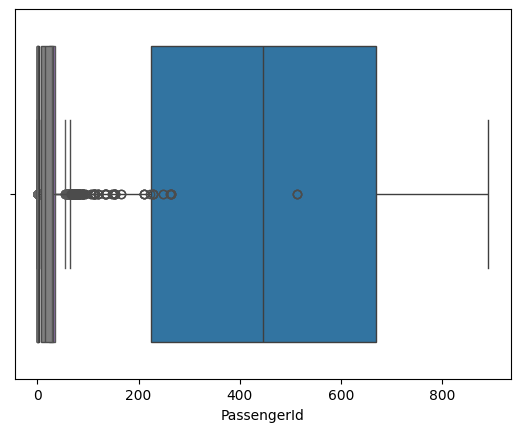

In [ ]:
# Menggunakan box-plot untuk melihat outlier yang ada 
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data, x= i)
    plt.show

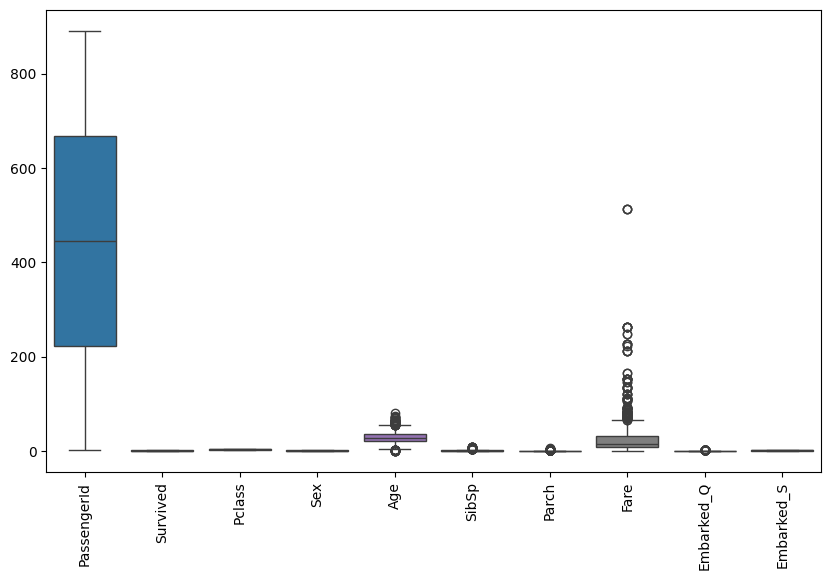

In [63]:
# Deteksi outlier dengan boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Menyimpan data yang sudah bersih
data.to_csv("titanic-dataset-clean-114.csv", index=False)